# QuaSaR: Identifying EEW Rings - Station Fault Topology

[Quake Safe Rings](./1a_stations_faultlnes_plot.ipynb) - in our efforts to understand the station fault topology - we make use of the International Federation Data of Seismic Networks (FDSN), the global standard and a [data service](http://www.fdsn.org/services/) for sharing seismic sensor wave form data. The Obspy librarires support FDSN. The list of resources and services that are used for retrieving station inventory and waveform data.

## OBJECTIVE 1.B - FAULT LINES MAP

### Fault line coordinates

We have completed objective 1.A. However, we will also include a mapping of the fault lines to give a perception of the station distribution relative to that of the map of fault lines. 


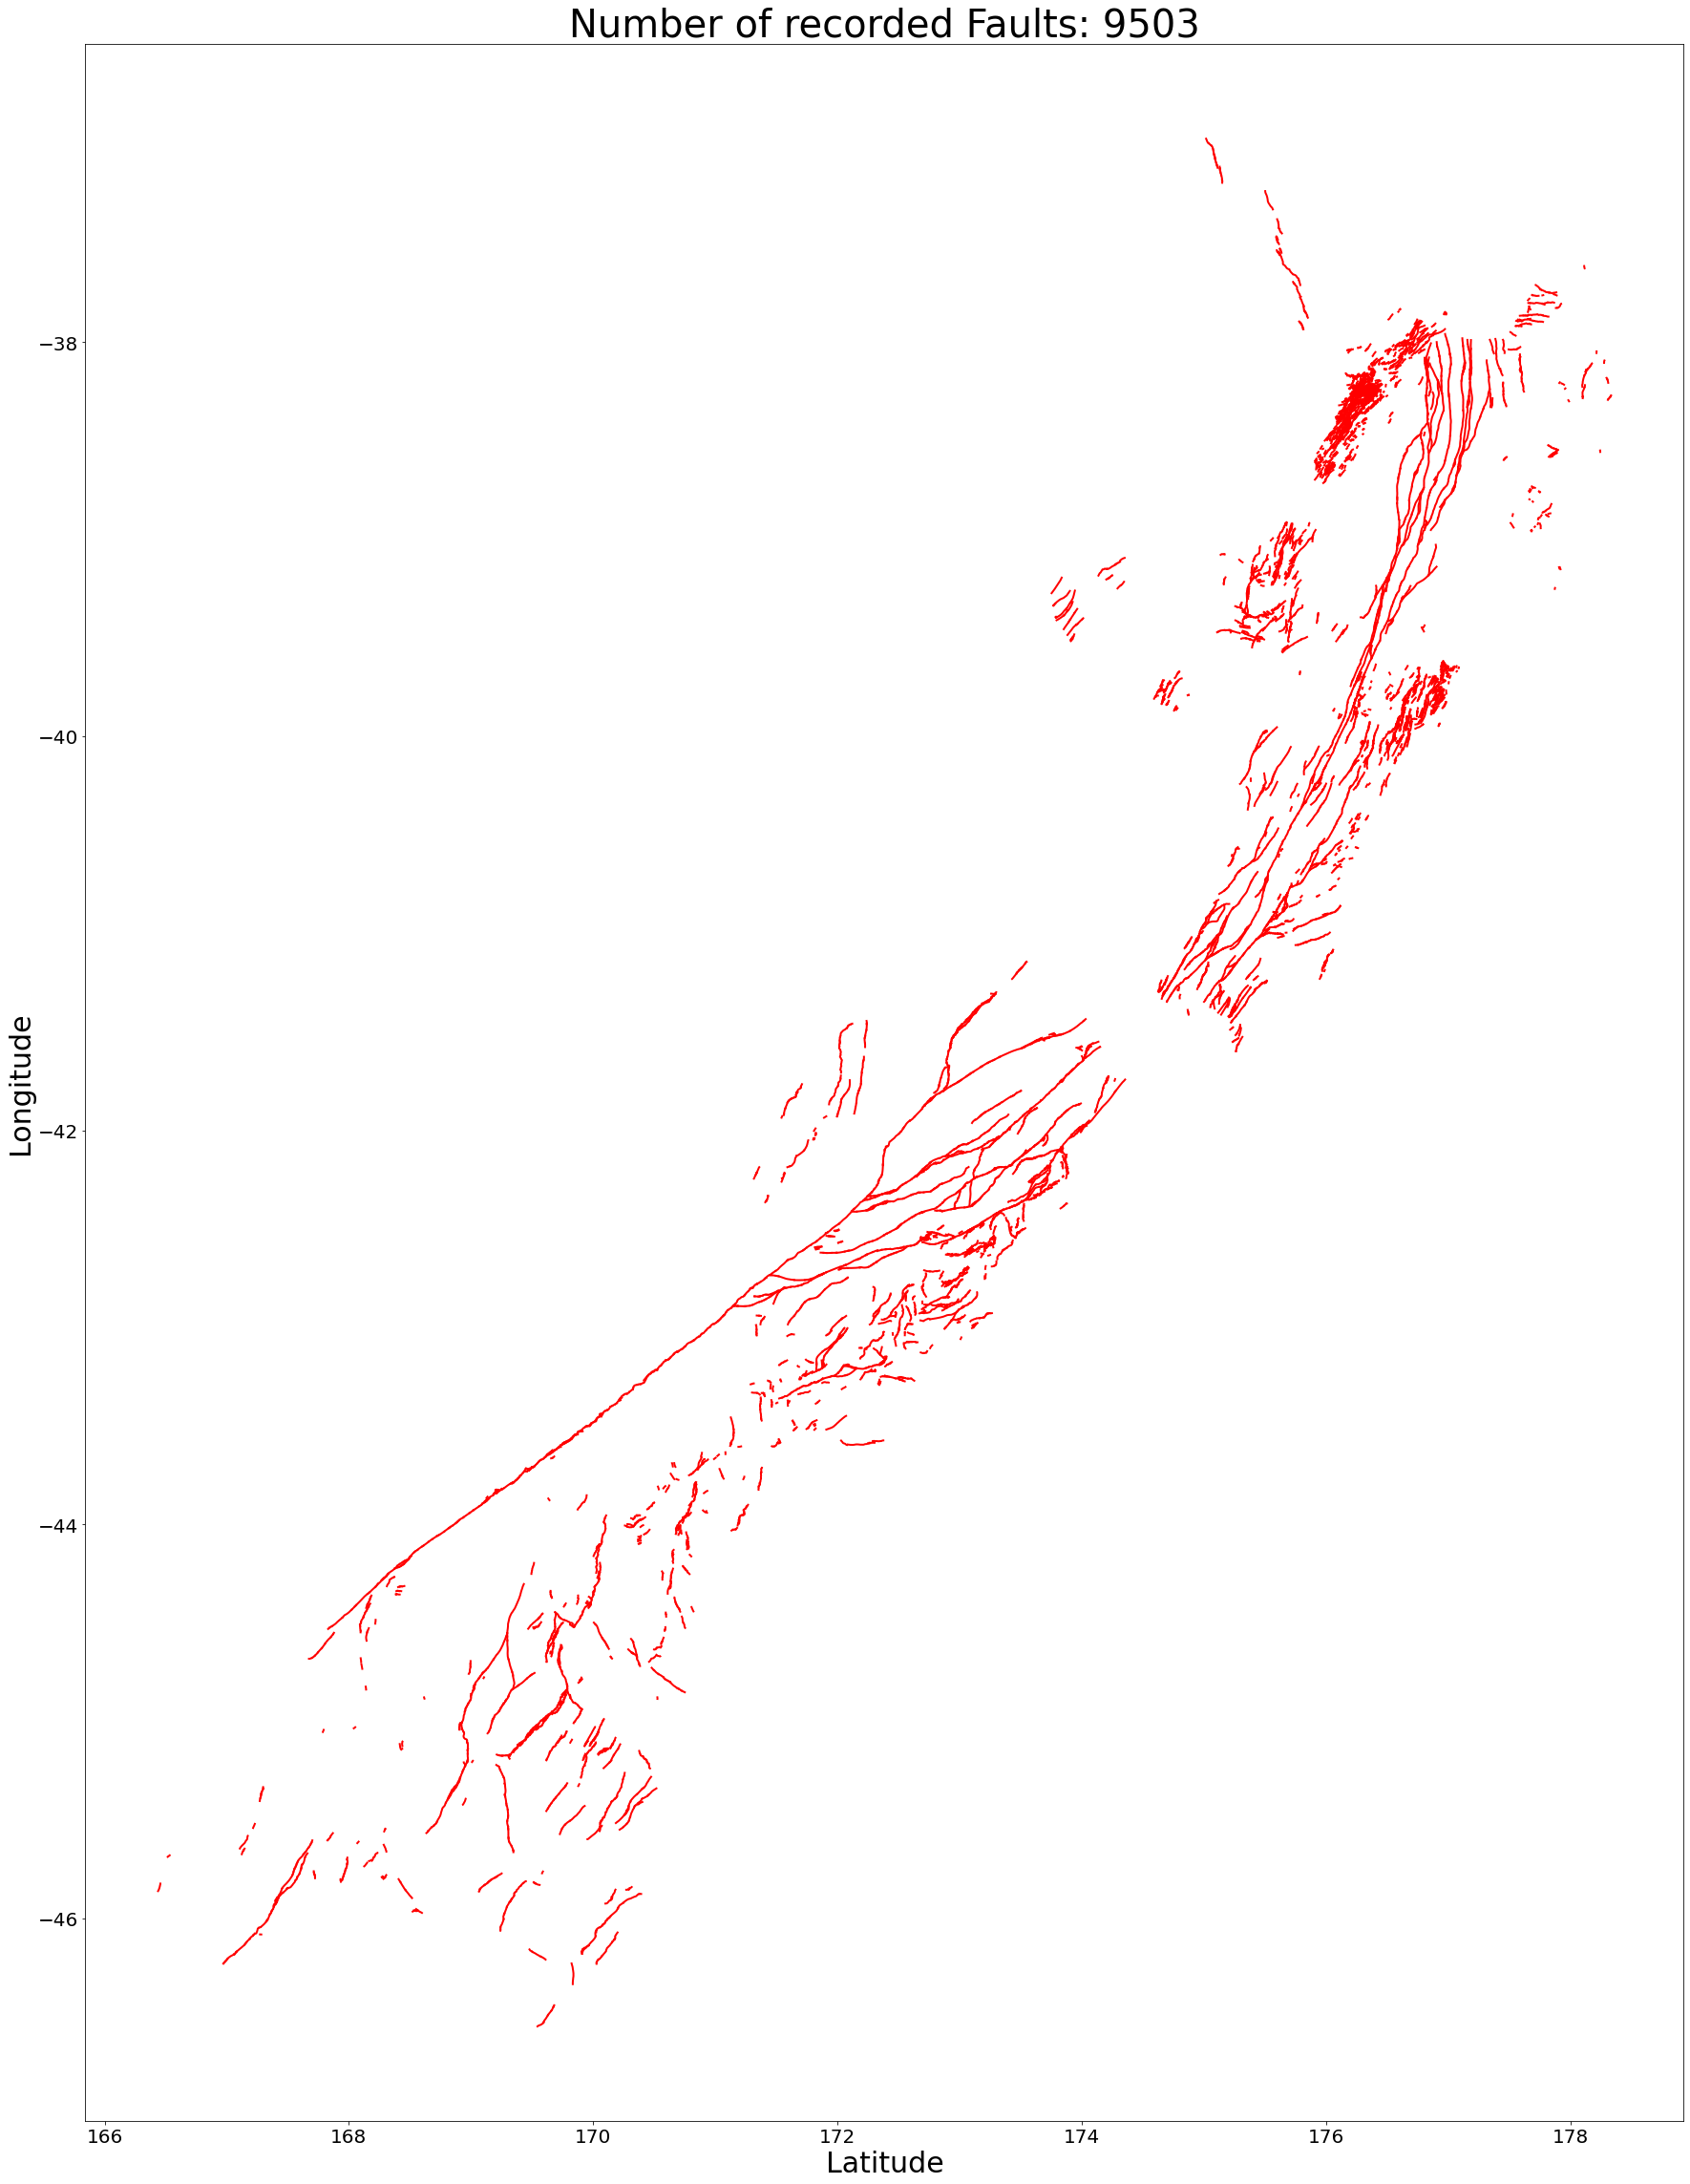

In [1]:
import matplotlib.pyplot as plt 
import json
from dictor import dictor

plt.figure(figsize=(30, 40))

'''Extract nested values from a JSON tree.'''

try:
    with open('/home/nuwan/workspace/quasar/data/NZAFD/JSON/NZAFD_Oct_2020_WGS84.json') as json_file: 
        data = json.load(json_file)

    for each_feature in range(len(data['features'])):
        points = {"x":[], "y":[]}
        path = dictor(data,'features.{}.geometry.paths.0'.format(each_feature))
        for each_coordinate in range(len(path)):
            points["x"].append(path[each_coordinate][0])
            points["y"].append(path[each_coordinate][1])
        plt.plot(points["x"],points["y"], color = 'red', linewidth=2, label="Faults")

    plt.title('Number of recorded Faults: %d' % len(data['features']), fontsize = 40)
    plt.xlabel('Latitude', fontsize=30)
    plt.ylabel('Longitude', fontsize=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
#    plt.legend(loc='upper left', fontsize=20)
    plt.show()
except Exception as err:
    print("Error message:", err)